In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
# sns.set_style("white")


In [51]:
df = pd.read_csv("datuk_dan_datin.csv")

In [111]:
_anugerah = df.Anugerah.sort_values()
_anugerah.value_counts()

Pingat Pangkuan Negara                                                     30308
Ahli Mangku Negara                                                         19102
Kesatria Mangku Negara                                                      7416
Darjah Indera Mahkota Pahang                                                3774
Ahli Mangku Negara                                                          3351
Kesatria Mangku Negara                                                      2287
Johan Setia Mahkota                                                         1932
Bentara Setia Diraja                                                        1477
Pingat Pangkuan Negara                                                      1229
Johan Mangku Negara                                                         1160
Darjah Indera Mahkota Pahang                                                1059
Darjah Setia Pangkuan Negeri                                                 856
Darjah Dato' Paduka Mahkota 

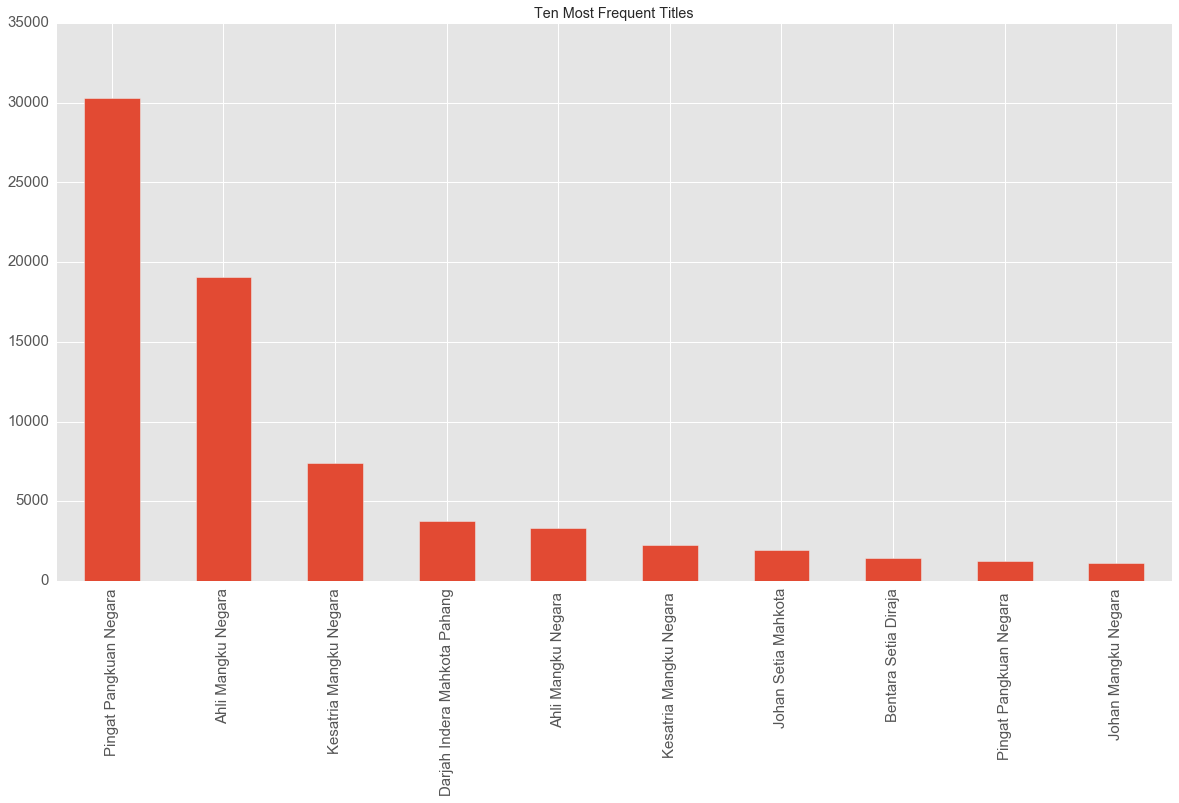

In [115]:
fig = plt.figure()
_anugerah.value_counts()[:10].plot(kind="bar",figsize=(20,10),title="Ten Most Frequent Titles")
matplotlib.rc('xtick', labelsize=15)
matplotlib.rc('ytick',labelsize=15)
plt.show()

In [92]:
df.Anugerah.value_counts().size

267

In [25]:
df.Nama.value_counts().size

86803

In [4]:
df[df.Anugerah == "Darjah Indera Mahkota Pahang"]["Tahun Kurniaan"].value_counts()

2012    774
2011    671
2009    580
2008    478
2007    431
2006    319
2005    245
2004    188
2001     88
Name: Tahun Kurniaan, dtype: int64

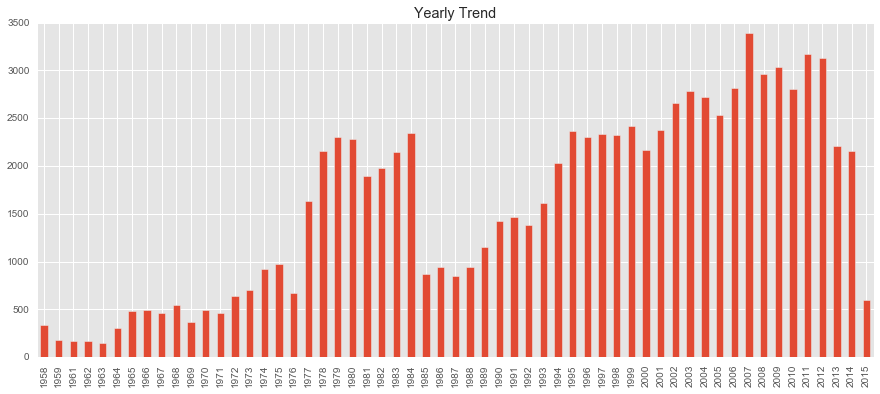

In [105]:
df = df[df["Tahun Kurniaan"] > 0]
tahun_kurniaan_counts = df["Tahun Kurniaan"].value_counts(sort=False)
tahun_kurniaan_counts.sort_index(inplace=True)
plt.figure(figsize=(15, 6))

tahun_kurniaan_counts.plot(kind="bar",title="Yearly Trend")
matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick',labelsize=10)

In [6]:
df.Anugerah.value_counts()[df.Anugerah.value_counts() <= 5]

Darjah Dato' Pahlawan Taming Sari                                          5
Darjah Dato' Paduka Cura Si Manja Kini                                     5
Darjah Kerabat Yang Amat Mulia                                             5
Darjah Seri Utama Sultan Mizan Zainal Abidin Terengganu                    5
Darjah Dato' Setia Tuanku Syed Putra Jamalullail                           5
Panglima Setia Diraja (Kehormat)                                           5
Darjah Jasa Bakti Sarawak                                                  5
Darjah Sri Sultan Ahmad Shah                                               5
Darjah Dato' Setia Paduka Tuanku Syed Sirajuddin Jamalullail               5
Darjah Paduka Mahkota Kedah                                                5
Darjah Datuk Amar Bintang Kenyalang                                        4
Darjah Dato' Paduka Jiwa Mahkota Kelantan                                  4
Seri Panglima Darjah Kinabalu                                              4

In [7]:
anugerah_rare = df.Anugerah.value_counts()[df.Anugerah.value_counts() <= 5].index.values
anugerah_rare = list(anugerah_rare)

In [8]:
'Darjah Dato\' Setia Paduka Tuanku Syed Sirajuddin Jamalullail' in anugerah_rare

True

In [9]:
df.Nama.value_counts()[df.Nama.value_counts()>5]

Encik Ismail bin Ahmad                                  12
Encik Abu Bakar bin Ahmad                               12
Encik Ahmad bin Abdullah                                12
Encik Abdul Rahman bin Ismail                           12
Encik Abdul Aziz bin Ismail                             10
Encik Hashim bin Ismail                                  9
Encik Abdul Rahman bin Ahmad                             9
Encik Ahmad bin Ismail                                   8
Encik Abdul Rahman bin Abdullah                          8
Encik Hassan bin Ahmad                                   8
Encik Mohamad bin Abdullah                               8
Encik Abdul Rahim bin Ahmad                              8
Encik Abdullah bin Kassim                                8
Encik Omar bin Ahmad                                     8
Encik Ismail bin Ibrahim                                 8
Encik Ismail bin Awang                                   8
Encik Ismail bin Hashim                                 

In [138]:
import re
def get_nama_negeri(anugerah):
    anugerah = anugerah.lower()
    nama_negeri = ["sarawak","sabah","negeri sembilan",
                   "pahang","perak","perlis",
                   "selangor","terengganu","kelantan",
                   "johor","pahang","melaka","kedah",
                   "pulau pinang","negara"]
    
    for negeri in nama_negeri:
        if re.search(negeri,anugerah):
            if negeri == "negara":
                return "persekutuan"
            else:
                return negeri
        
    anugerah_negara = ["gagah berani","perkasa persekutuan","gagah perkasa",
                       "setia mahkota","setia diraja","tentera udara",
                       "kerabat diraja","setia diraja","mahkota malaysia",
                       "perutusan keberanian"]
    
    for a in anugerah_negara:
        if re.search(a,anugerah):
            return "persekutuan"
        
    anugerah_negeri_dict = {"tuanku ja'afar yang amat terpuji":"negeri sembilan",
                            "taming sari":"perak",
                            "cura si manja kini":"perak",
                            "kinabalu":"sabah",
                            "pangkuan negeri":"pulau pinang",
                            "pangkuan negari":"pulau pinang",
                            "kenyalang":"sarawak",
                            "yam tuan raden":"negeri sembilan",
                            "salahuddin abdul aziz shah":"selangor",
                            "abdul halim mu'adzam shah":"kedah",
                            "baginda syed putra":"perlis",
                            "paduka tuanku ja'afar":"negeri sembilan",
                            "sultan ahmad shah":"pahang",
                            "sultan nazrin shah":"perak",
                            "jamalullail":"perlis",
                            "sharafuddin idris shah":"selangor",
                            "mahkota wilayah":"persekutuan",
                            "mangku wilayah":"persekutuan",
                            "tuanku mukhriz":"negeri sembilan",
                            "tuanku muhriz":"negeri sembilan",
                            "yang amat dihormati pangkat pertama":"johor",
                            "kerabat halimi":"kedah",
                            "mahawangsa":"kedah",
                            "halim muadzam shah":"kedah",
                            
                            "darjah bakti":"persekutuan"
                            
                          }
    
    for k,v in anugerah_negeri_dict.items():
        if re.search(k,anugerah):
            return v

df["nama_negeri"] = df.Anugerah.apply(lambda x: get_nama_negeri(x))


In [139]:
df[df["nama_negeri"] == None]

,Unnamed: 0,Anugerah,Bil,Nama,Singkatan,Tahun Kurniaan,nama_negeri


In [118]:

anugerah_counts = df.Anugerah
anugerah_counts.sort_index(inplace=True)
anugerah_counts = anugerah_counts.value_counts().to_frame()
anugerah_counts["nama_anugerah"] = anugerah_counts.index
anugerah_counts["nama_negeri"] = anugerah_counts.nama_anugerah.apply(lambda x: get_nama_negeri(x))
anugerah_counts

,Anugerah,nama_anugerah,nama_negeri
Pingat Pangkuan Negara,30308,Pingat Pangkuan Negara,persekutuan
Ahli Mangku Negara,19102,Ahli Mangku Negara,persekutuan
Kesatria Mangku Negara,7416,Kesatria Mangku Negara,persekutuan
Darjah Indera Mahkota Pahang,3774,Darjah Indera Mahkota Pahang,pahang
Ahli Mangku Negara,3351,Ahli Mangku Negara,persekutuan
Kesatria Mangku Negara,2287,Kesatria Mangku Negara,persekutuan
Johan Setia Mahkota,1932,Johan Setia Mahkota,persekutuan
Bentara Setia Diraja,1477,Bentara Setia Diraja,persekutuan
Pingat Pangkuan Negara,1229,Pingat Pangkuan Negara,persekutuan
Johan Mangku Negara,1160,Johan Mangku Negara,persekutuan


In [142]:
df = df[df["Tahun Kurniaan"] > 0]
df = df[df["Tahun Kurniaan"] < 2016]
_g = df.groupby(["nama_negeri"])


In [ ]:
def lukis(_grouped,nama_negeri):

    johor=_grouped.get_group(nama_negeri)["Tahun Kurniaan"].value_counts()
    johor.sort_index(inplace=True)
    h, = plt.plot(johor.index, johor.values, linewidth=2,label=nama_negeri,marker="o")
    return h
    

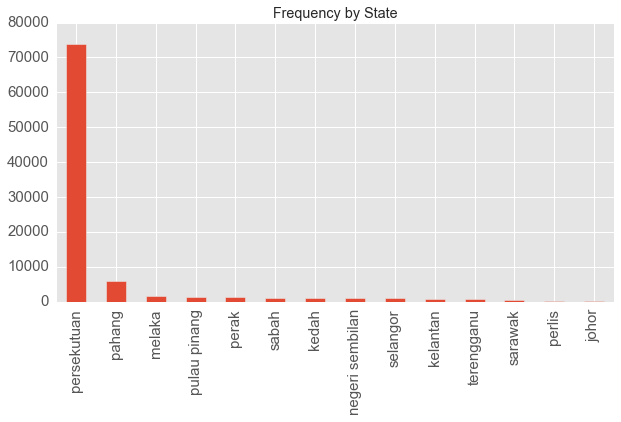

In [165]:
df.nama_negeri.value_counts().plot(kind="bar",figsize=(10,5),title="Frequency by State")

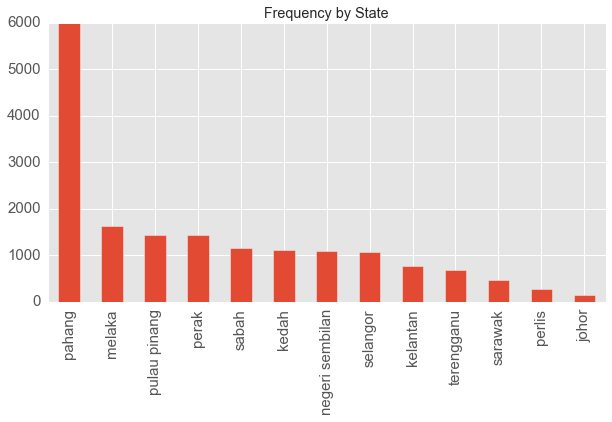

In [166]:
negeri_sahaja = df[df.nama_negeri != "persekutuan"]
negeri_sahaja.nama_negeri.value_counts().plot(kind="bar",figsize=(10,5),title="Frequency by State")

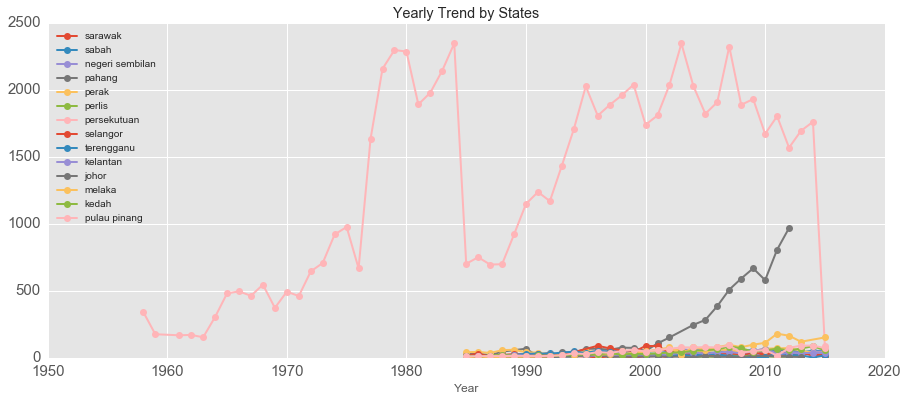

In [170]:
plt.close("all")
plt.figure(figsize=(15,6))
nama_nama_negeri =["sarawak","sabah","negeri sembilan",
                   "perak","perlis",
                   "selangor","terengganu","kelantan",
                   "johor","melaka","kedah",
                   "pulau pinang","pahang","persekutuan"]
handles =[]
for negeri in nama_nama_negeri:
    h = lukis(_g,negeri)
    handles.append(h)

plt.title("Yearly Trend by States")
plt.xlabel("Year")
plt.legend(handles=handles,loc=2)

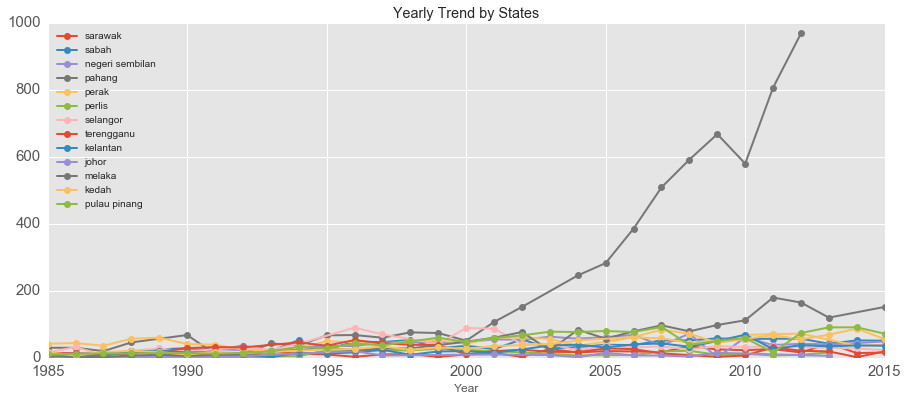

In [171]:
plt.close("all")
plt.figure(figsize=(15,6))
nama_nama_negeri_tanpa_pahang =["sarawak","sabah","negeri sembilan",
                                
                                "perak","perlis",
                                "selangor","terengganu","kelantan",
                                "johor","melaka","kedah",
                                "pulau pinang","pahang"]
handles =[]
for negeri in nama_nama_negeri_tanpa_pahang:
    h = lukis(_g,negeri)
    handles.append(h)

plt.title("Yearly Trend by States")
plt.xlabel("Year")
plt.legend(handles=handles,loc=2)

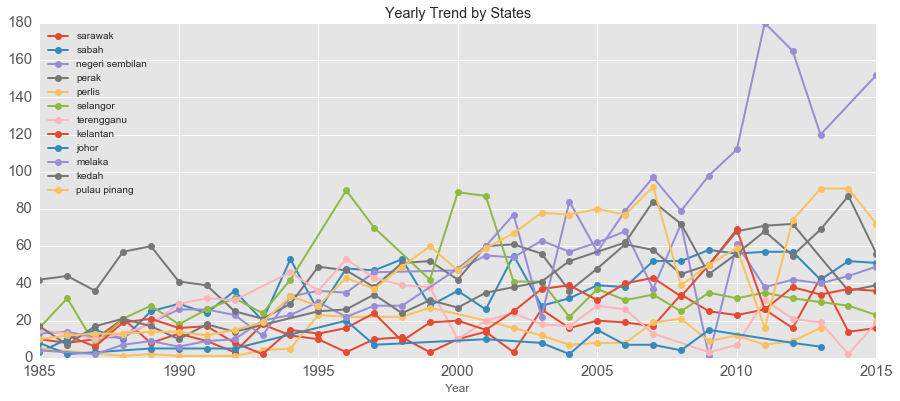

In [172]:
plt.close("all")
plt.figure(figsize=(15,6))
nama_nama_negeri_tanpa_pahang =["sarawak","sabah","negeri sembilan",
#                                 "pahang",
                                "perak","perlis",
                                "selangor","terengganu","kelantan",
                                "johor","melaka","kedah",
                                "pulau pinang"]
handles =[]
for negeri in nama_nama_negeri_tanpa_pahang:
    h = lukis(_g,negeri)
    handles.append(h)

plt.title("Yearly Trend by States")
plt.xlabel("Year")
plt.legend(handles=handles,loc=2)

In [16]:
nama_anugerah = df.Anugerah.unique()
print(nama_anugerah.size)
nama_anugerah

267


array(['Darjah Utama Seri Mahkota Negara', 'Seri Maharaja Mangku Negara',
       'Seri Maharaja Mangku Negara (Kehormat)', 'Panglima Mangku Negara',
       'Panglima Mangku Negara (Kehormat)', 'Johan Mangku Negara',
       'Johan Mangku Negara (Kehormat)', 'Ahli Mangku Negara',
       'Ahli Mangku Negara (Kehormat)', 'Panglima Gagah Berani',
       'Jasa Perkasa Persekutuan', 'Kepujian Perutusan Keberanian',
       'Darjah Utama Seri Mahkota Negara (Kehormat)',
       'Pingat Pangkuan Negara', 'Pingat Pangkuan Negara (Kehormat)',
       'Kesatria Mangku Negara', 'Kesatria Mangku Negara (Kehormat)',
       'Seri Pahlawan Gagah Perkasa', 'Panglima Setia Diraja',
       'Johan Setia Diraja', 'Pingat Pangkuan Negara (P.P.N.)',
       'Bentara Setia Diraja', 'Panglima Setia Mahkota',
       'Johan Setia Mahkota', 'Johan Setia Mahkota (Kehormat)',
       'Seri Setia Mahkota Malaysia',
       'Seri Setia Mahkota Malaysia (Kehormat)',
       'Panglima Setia Mahkota (Kehormat)',
       'Panglim

In [182]:
anugerah = df.Anugerah.unique()
anugerah = pd.Series(anugerah)
anugerah_df = anugerah.to_frame()

In [183]:
anugerah_df["nama_negeri"]=anugerah_df[0].apply(lambda x: get_nama_negeri(x))

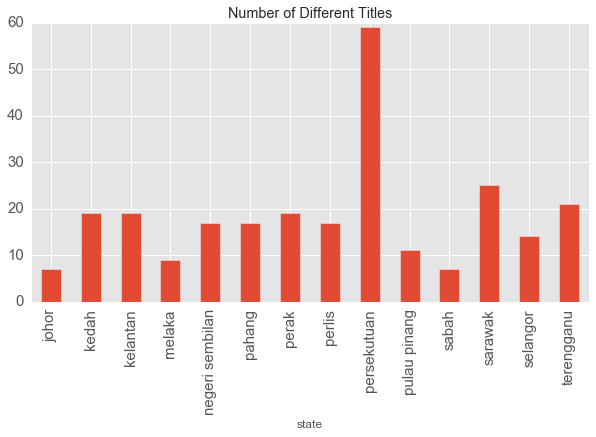

In [198]:
grouped_by_negeri = anugerah_df.groupby("nama_negeri").count().plot(kind="bar",title="Number of Different Titles",figsize=(10,5))
plt.legend([])
plt.xlabel("state")
plt.show()

# grouped_by_negeri.get_group("pulau pinang")

In [19]:
df[df.nama_negeri.isnull()].Anugerah.unique()

array(['Darjah Kerabat Yang Amat Dihormati ',
       'Darjah Kerabat Yang Amat Mulia', 'Darjah Kerabat Yang Amat Mulia ',
       'Darjah Kerabat Yang Amat Dihormati',
       'Dajah Kerabat Yang Amat Dihormati', 'Darjah Kerabat'], dtype=object)

In [23]:
grouped = df.groupby("nama_negeri")

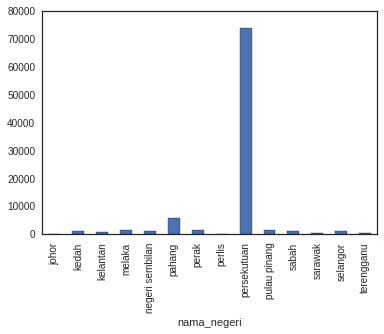

In [34]:
grouped.count().Anugerah.plot(kind="bar")

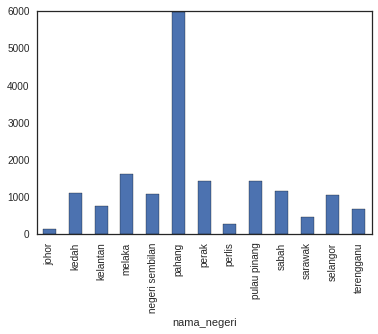

In [38]:
df_tanpa_persekutuan = df[df.nama_negeri != "persekutuan"]
grouped_tanpa_persekutuan = df_tanpa_persekutuan.groupby("nama_negeri")
grouped_tanpa_persekutuan.count().Anugerah.plot(kind="bar")

In [179]:
def plot_by_negeri(df,nama_negeri):
    anugerah_ikut_negeri = df[df.nama_negeri == nama_negeri]
    tahun_kurniaan = anugerah_ikut_negeri["Tahun Kurniaan"].value_counts(sort=False)
    tahun_kurniaan.sort_index(inplace=True)
    
    plt.title(nama_negeri.upper())
    tahun_kurniaan.plot(kind="bar",figsize=(20,20))

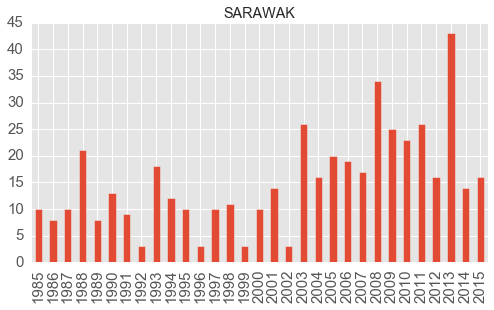

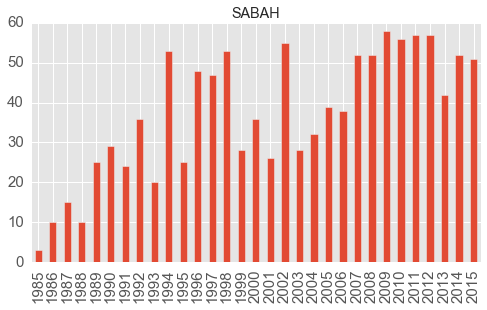

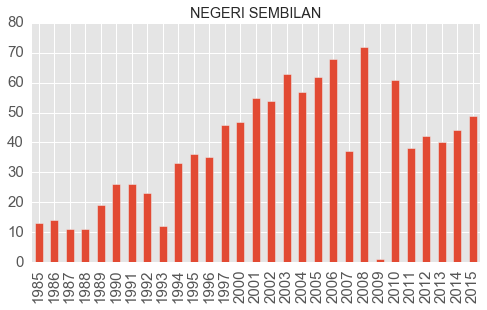

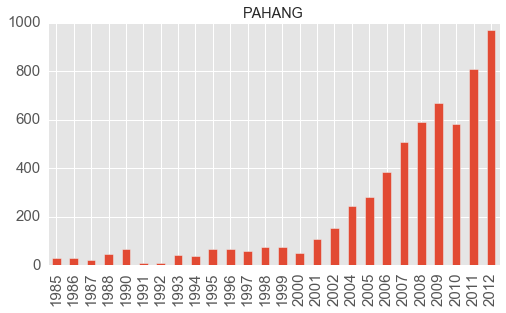

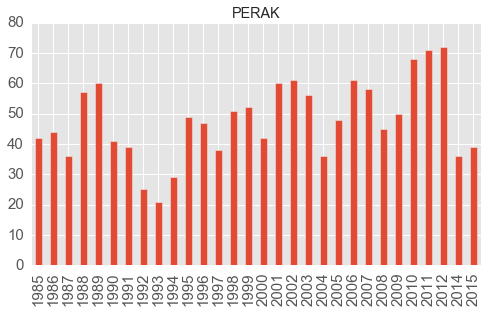

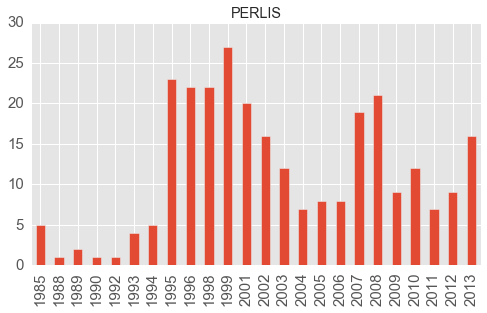

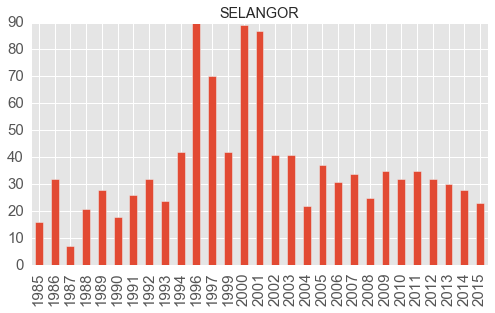

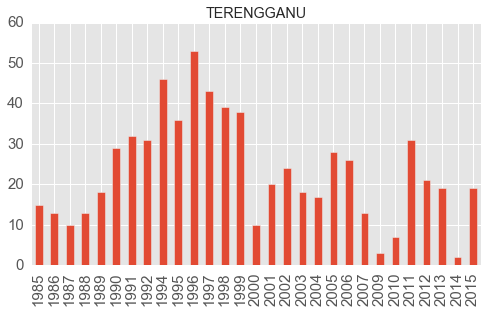

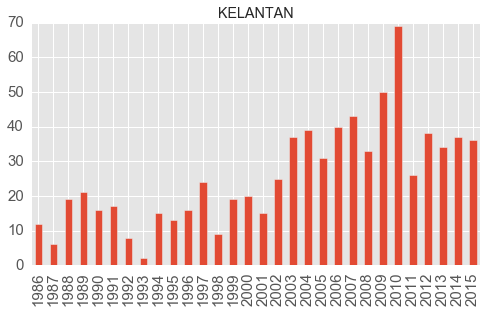

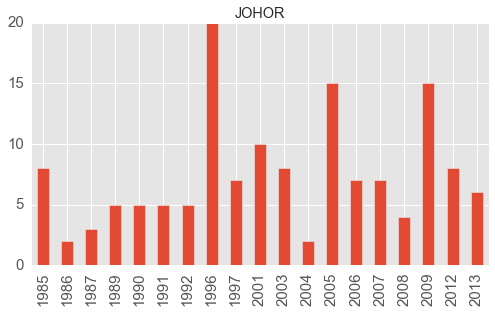

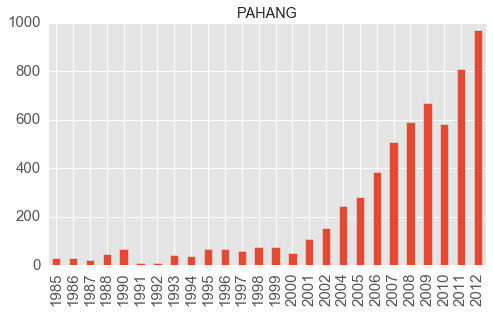

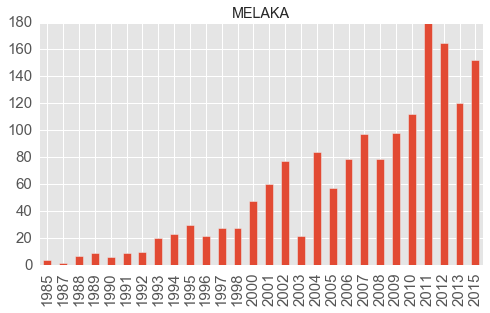

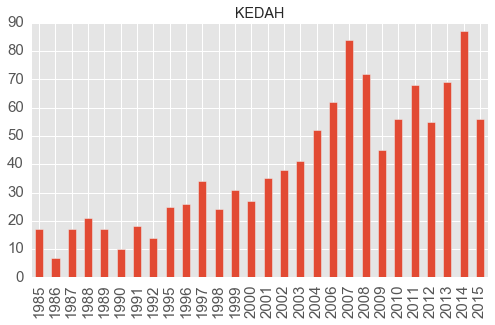

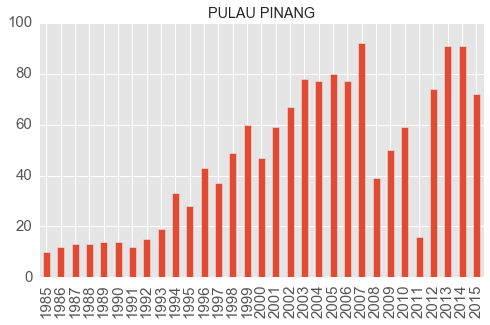

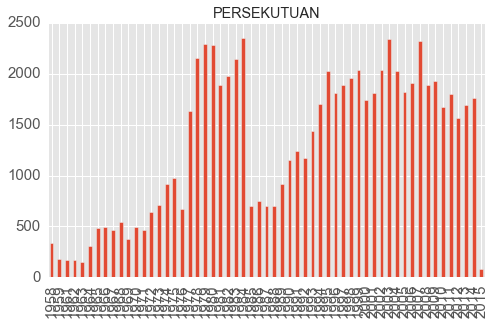

In [180]:
nama_nama_negeri =["sarawak","sabah","negeri sembilan",
                   "pahang","perak","perlis",
                   "selangor","terengganu","kelantan",
                   "johor","pahang","melaka","kedah",
                   "pulau pinang","persekutuan"]
plt.close("all")

for idx,negeri in enumerate(nama_nama_negeri):
    plt.figure(figsize=(20,20))
    plt.subplot(5,3,(idx+1))
    plot_by_negeri(df,negeri)
    plt.tight_layout()
    plt.show()

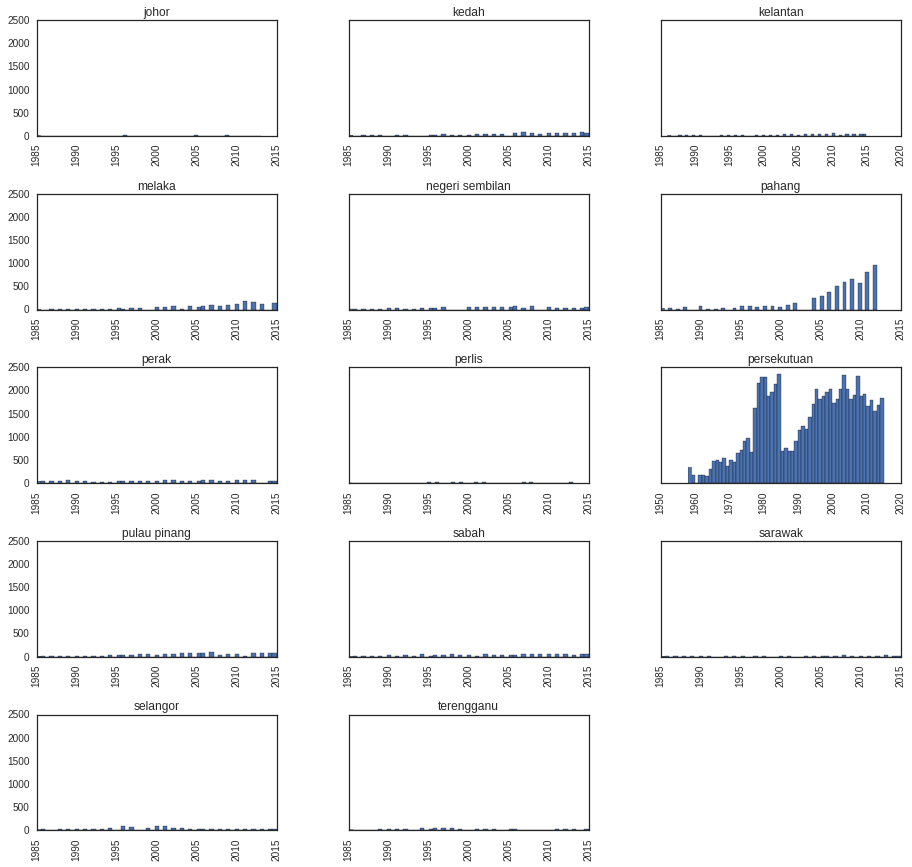

In [88]:
df.hist(by='nama_negeri',column = 'Tahun Kurniaan',
        layout=(5,3),figsize=(15, 15),
        sharey=True,bins=len(df["Tahun Kurniaan"].unique()))
plt.show()

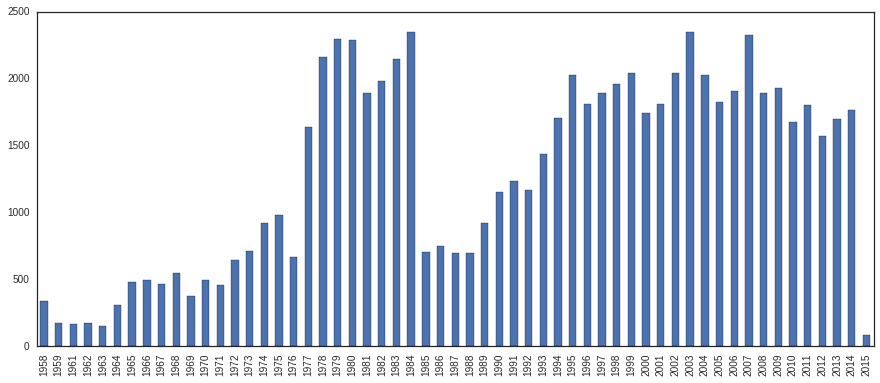

In [18]:
anugerah_negeri_persekutuan = df[df.nama_negeri == "persekutuan"]
tahun_kurniaan_persekutuan_counts = anugerah_negeri_persekutuan["Tahun Kurniaan"].value_counts(sort=False)
tahun_kurniaan_persekutuan_counts.sort_index(inplace=True)
plt.figure(figsize=(15, 6))
tahun_kurniaan_persekutuan_counts.plot(kind="bar")

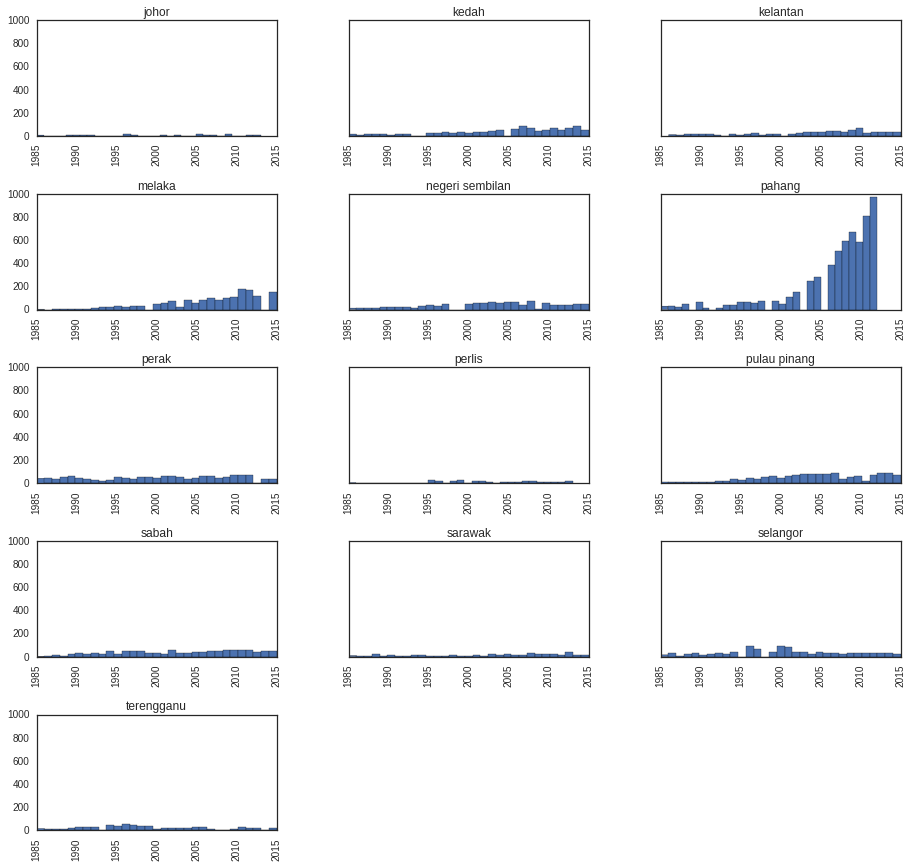

In [100]:
anugerah_negeri_tanpa_persekutuan = df[df.nama_negeri != "persekutuan"]
anugerah_negeri_tanpa_persekutuan.hist(by='nama_negeri',column = 'Tahun Kurniaan',
#                                        color="br",
                                       layout=(5,3),figsize=(15, 15),
                                       sharey=True,bins=len(anugerah_negeri_tanpa_persekutuan["Tahun Kurniaan"].unique()),
                                       )
plt.show()

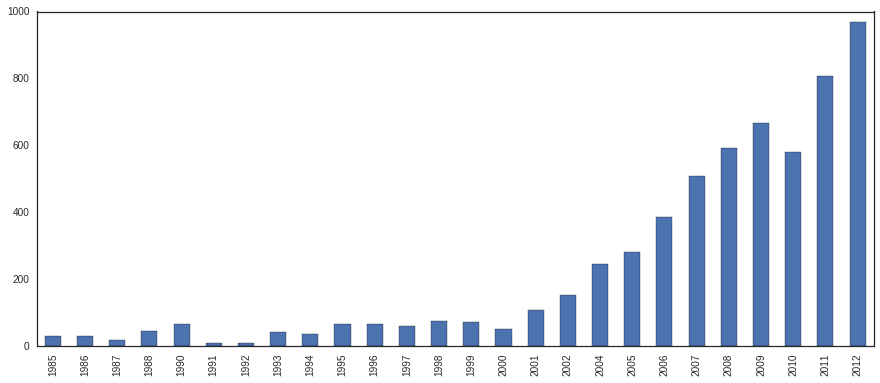

In [90]:
anugerah_negeri_pahang = df[df.nama_negeri == "pahang"]
tahun_kurniaan_pahang_counts = anugerah_negeri_pahang["Tahun Kurniaan"].value_counts(sort=False)
tahun_kurniaan_pahang_counts.sort_index(inplace=True)
plt.figure(figsize=(15, 6))
tahun_kurniaan_pahang_counts.plot(kind="bar")

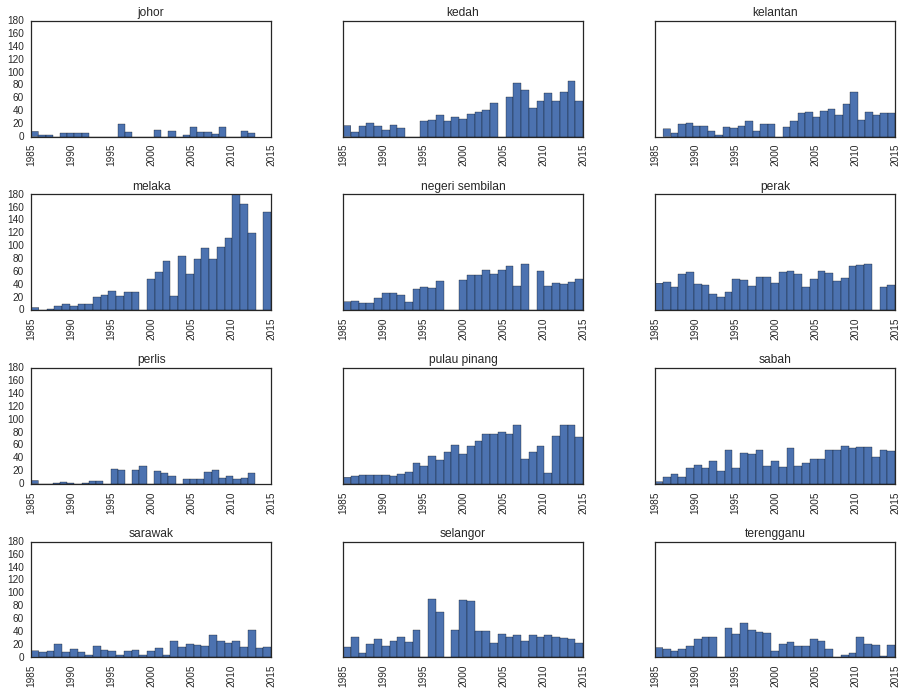

In [91]:
anugerah_negeri_tanpa_pahang = anugerah_negeri_tanpa_persekutuan[anugerah_negeri_tanpa_persekutuan.nama_negeri != "pahang"]
anugerah_negeri_tanpa_pahang.hist(by='nama_negeri',column = 'Tahun Kurniaan',
                                  layout=(5,3),figsize=(15, 15),
                                  sharey=True,bins=len(anugerah_negeri_tanpa_pahang["Tahun Kurniaan"].unique()))
plt.show()

In [93]:
anugerah_negeri_pulau_pinang = df[df.nama_negeri == "pulau pinang"]
anugerah_negeri_pulau_pinang

,Unnamed: 0,Anugerah,Bil,Nama,Singkatan,Tahun Kurniaan,nama_negeri
45575,45575,Darjah Yang Mulia Pangkuan Negeri,45595,Tan Sri Professor Dr. Chin Fung Kee,D.M.P.N.,1985,pulau pinang
45576,45576,Darjah Yang Mulia Pangkuan Negeri,45596,Dato' Dr. Elyas bin Omar,D.M.P.N.,1985,pulau pinang
45577,45577,Darjah Setia Pangkuan Negeri,45597,Haji Ahmad bin Saleh,D.S.P.N.,1985,pulau pinang
45578,45578,Darjah Setia Pangkuan Negeri,45598,Ho Thian Hock,D.S.P.N.,1985,pulau pinang
45579,45579,Darjah Setia Pangkuan Negeri,45599,James S Ong,D.S.P.N.,1985,pulau pinang
45580,45580,Darjah Setia Pangkuan Negeri,45600,Dr. Lon Guan Lye,D.S.P.N.,1985,pulau pinang
45581,45581,Darjah Setia Pangkuan Negeri,45601,M S A Zachariah,D.S.P.N.,1985,pulau pinang
45582,45582,Darjah Setia Pangkuan Negeri,45602,Professor Dr. Nayan bin Ariffin,D.S.P.N.,1985,pulau pinang
45583,45583,Darjah Setia Pangkuan Negeri,45603,"Wong Peng Chong, John",D.S.P.N.,1985,pulau pinang
45584,45584,Darjah Setia Pangkuan Negeri,45604,Brig. Jen. Zainal Abidin bin Haji Jawati,D.S.P.N.,1985,pulau pinang


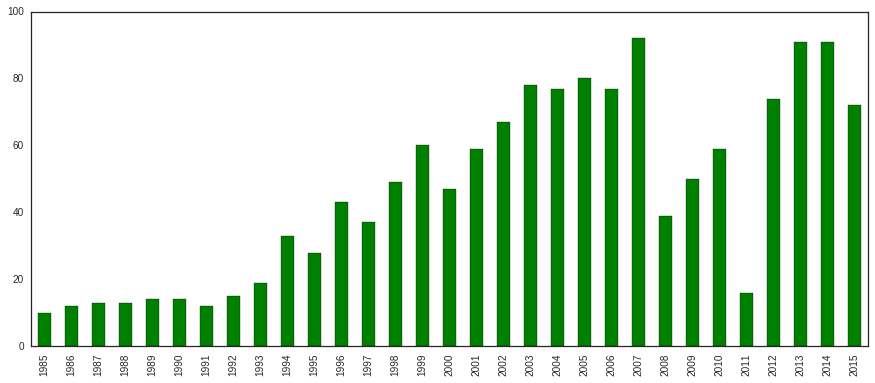

In [94]:
tahun_kurniaan_pulau_pinang_counts = anugerah_negeri_pulau_pinang["Tahun Kurniaan"].value_counts(sort=False)
tahun_kurniaan_pulau_pinang_counts.sort_index(inplace=True)
plt.figure(figsize=(15, 6))
tahun_kurniaan_pulau_pinang_counts.plot(kind="bar",color="g")

In [95]:
anugerah_negeri_kelantan = df[df.nama_negeri == "kelantan"]
anugerah_negeri_kelantan

,Unnamed: 0,Anugerah,Bil,Nama,Singkatan,Tahun Kurniaan,nama_negeri
45642,45642,Darjah Seri Paduka Mahkota Kelantan,45662,Tan Sri Ahmad Nordin bin Zakaria,S.P.M.K.,1986,kelantan
45643,45643,Darjah Seri Paduka Mahkota Kelantan,45663,DYTM Sufri Bolkiah ibni Almarhum Sultan Haji O...,S.P.M.K.,1986,kelantan
45644,45644,Darjah Seri Paduka Jiwa Mahkota Kelantan,45664,YBM Dato' Merjan bt. Al-Marhum Sultan Yahya Petra,S.J.M.K.,1986,kelantan
45645,45645,Darjah Seri Paduka Jiwa Mahkota Kelantan,45665,YBM Hajjah Tengku Azizah bt. Tengku Mohd. Hamzah,S.J.M.K.,1986,kelantan
45646,45646,Darjah Seri Paduka Jiwa Mahkota Kelantan,45666,Tengku Sulaiman Shah Al-Haj ibni Sultan Salah...,S.J.M.K.,1986,kelantan
45647,45647,Darjah Dato' Paduka Jiwa Mahkota Kelantan,45667,Dato' Eric Chia,D.J.M.K.,1986,kelantan
45648,45648,Darjah Dato' Paduka Jiwa Mahkota Kelantan,45668,Dato' Senu bin Abdul Rahman,D.J.M.K.,1986,kelantan
45649,45649,Darjah Dato' Paduka Jiwa Mahkota Kelantan,45669,Encik Tan Heng Chew,D.J.M.K.,1986,kelantan
45650,45650,Darjah Dato' Paduka Jiwa Mahkota Kelantan,45670,YM Tengku Khalid bin Al-Marhum Sultan Abdullah,D.J.M.K.,1986,kelantan
45651,45651,Darjah Dato' Paduka Jiwa Mahkota Kelantan,45671,YM Tengku Mustapha bin Tengku Mohamed,D.J.M.K.,1986,kelantan


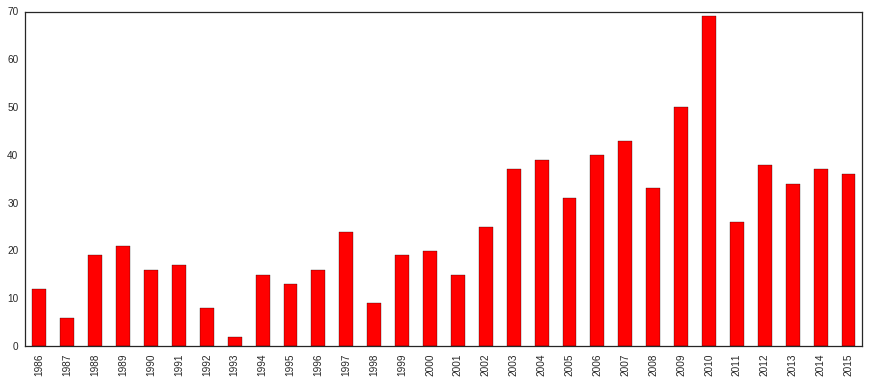

In [96]:
tahun_kurniaan_kelantan_counts = anugerah_negeri_kelantan["Tahun Kurniaan"].value_counts(sort=False)
tahun_kurniaan_kelantan_counts.sort_index(inplace=True)
plt.figure(figsize=(15, 6))
tahun_kurniaan_kelantan_counts.plot(kind="bar",color="r")